In [33]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
plt.style.use('default')
# This next line tells jupyter to render the images inline
%matplotlib inline
import matplotlib_inline
# This renders your figures as vector graphics AND gives you an option to download a Pindices too
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

# Exercise: Visualizing Stock Indices

We're loading three stock indices here; the Nasdaq, the SP 500, the Dow Jones. We're also setting it up correclty with date time. 

In [34]:
indices = pd.read_csv('indices.csv')
indices.info()
indices["Date"] = indices["Date"].astype("datetime64[ns]")
indices.set_index('Date', inplace=True)
indices

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       950 non-null    object 
 1   Dow Jones  950 non-null    float64
 2   SP 500     950 non-null    float64
 3   Nasdaq     950 non-null    float64
dtypes: float64(3), object(1)
memory usage: 29.8+ KB


/tmp/ipykernel_2099317/1002151234.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  indices["Date"] = indices["Date"].astype("datetime64[ns]")


,Dow Jones,SP 500,Nasdaq
Date,,,
2019-12-02,27783.03906,3113.870117,8309.259766
2019-12-03,27502.81055,3093.199951,8254.740234
2019-12-04,27649.77930,3112.760010,8296.530273
2019-12-05,27677.78906,3117.429932,8308.400391
2019-12-06,28015.06055,3145.909912,8397.370117
...,...,...,...
2023-09-05,34641.96875,4496.830078,15508.240230
2023-09-06,34443.19141,4465.479980,15371.440430
2023-09-07,34500.73047,4451.140137,15258.519530


## Task 1: Plot the stock of all three indices in one plot

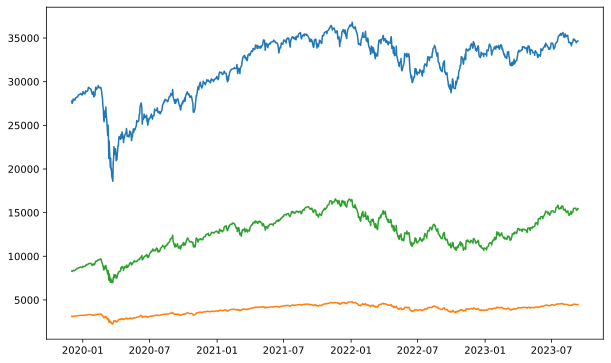

In [35]:
## your code
# time changes matter
time = indices.index
fig, axs = plt.subplots(1,1, figsize = (10,6))
axs.plot(time, indices["Dow Jones"])
axs.plot(time, indices["SP 500"])
axs.plot(time, indices["Nasdaq"])

Do you see any problems with this representation?

## Task 2: Plot The inidices in three sub-plots below each other

Is that easy to compare? 

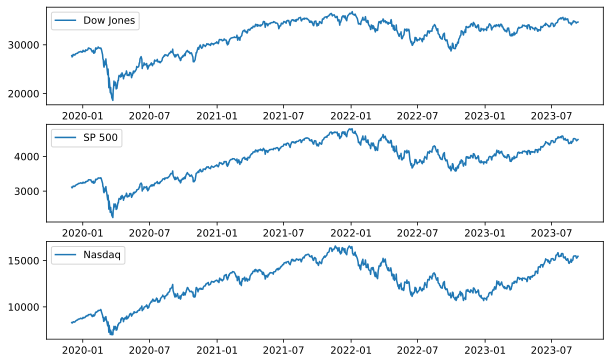

In [36]:
## your code
fig, axs = plt.subplots(3,1, figsize = (10,6))
axs[0].plot(time, indices["Dow Jones"], label = "Dow Jones")
axs[0].legend()
axs[1].plot(time, indices["SP 500"], label = "SP 500")
axs[1].legend()
axs[2].plot(time, indices["Nasdaq"], label = "Nasdaq")
axs[2].legend()

## Task 3: Plotting Change
 
Create a derived dataset that contains the change relative to the first day in your dataset and plot this in one plot. 

In [37]:
indices["Dow Jones"].iloc[0]

27783.03906

In [38]:
## your code
def change(name):
    init = indices[name].iloc[0]
    cname = f"{name}_change"
    indices[cname] = indices[name] / init

names = indices.columns
for name in names:
    change(name)
indices

,Dow Jones,SP 500,Nasdaq,Dow Jones_change,SP 500_change,Nasdaq_change
Date,,,,,,
2019-12-02,27783.03906,3113.870117,8309.259766,1.000000,1.000000,1.000000
2019-12-03,27502.81055,3093.199951,8254.740234,0.989914,0.993362,0.993439
2019-12-04,27649.77930,3112.760010,8296.530273,0.995204,0.999643,0.998468
2019-12-05,27677.78906,3117.429932,8308.400391,0.996212,1.001143,0.999897
2019-12-06,28015.06055,3145.909912,8397.370117,1.008351,1.010289,1.010604
...,...,...,...,...,...,...
2023-09-05,34641.96875,4496.830078,15508.240230,1.246875,1.444129,1.866380
2023-09-06,34443.19141,4465.479980,15371.440430,1.239720,1.434061,1.849917
2023-09-07,34500.73047,4451.140137,15258.519530,1.241791,1.429456,1.836327


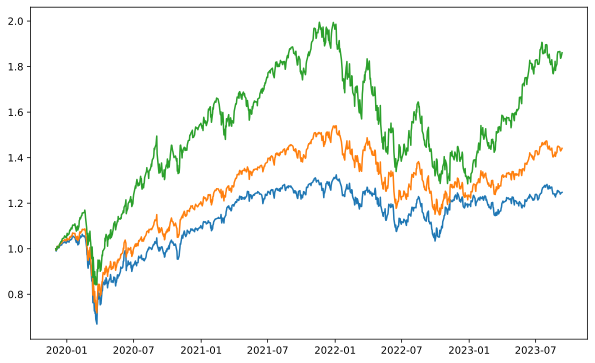

In [39]:
fig, axs = plt.subplots(1,1, figsize = (10,6))
axs.plot(time, indices["Dow Jones_change"], label = "Dow Jones")

axs.plot(time, indices["SP 500_change"], label = "SP 500")

axs.plot(time, indices["Nasdaq_change"], label = "Nasdaq")
